In [51]:
#  import some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut

#  import data and specify patient diagnose and outcome

In [52]:
#info = pd.read_csv('data/data_2states.txt', sep = '\t')
#features = pd.read_table('results/2state_ARI.txt',sep = ',')

info = pd.read_csv('data/data_2states.txt', sep = '\t')
features = pd.read_table('results/2state_ARI.txt',sep = ',')

data = pd.concat([info, features], axis = 1)
# drop unknown measures
data = data.drop(data[(data.Outcome_Prog == 3)].index)

In [53]:
data

,Patient,Diag,Age,Sex,Injury,TSI,State,CRSR,Outcome_Diag,Group_Diag,Outcome_Prog,Group_Prog,ID,dPLI_ARI,Hub_ARI,dirhub_ARI
0,WSAS02,UWS,29,M,TBI,-,Acute,4,1,UWS,1,Recovered,WSAS02,0.026312,1.235972,0.194829
1,WSAS05,MCS,28,M,TBI,9 Y,Chronic,10,2,MCS,0,Non-recovered,WSAS05,0.019862,1.145439,0.331827
2,WSAS09,UWS,50,F,Stroke,25 D,Acute,4,1,UWS,1,Recovered,WSAS09,0.065431,1.075923,1.352848
3,WSAS10,UWS,75,F,Stroke,NaN,Acute,5,1,UWS,0,Non-recovered,WSAS10,0.024221,1.020861,0.357689
4,WSAS11,UWS,28,F,Anoxic,1Y,Chronic,6,1,UWS,0,Non-recovered,WSAS11,0.023570,1.116612,0.412443
5,WSAS12,MCS,36,F,TBI,2Y,Chronic,11,2,MCS,0,Non-recovered,WSAS12,0.023890,0.905420,0.458246
6,WSAS13,UWS,24,M,Anoxic,8Y,Chronic,5,1,UWS,0,Non-recovered,WSAS13,0.023967,0.815346,0.445385
7,WSAS17,Coma,74,F,Anoxic,10D,Acute,0,0,Coma,0,Non-recovered,WSAS17,0.017042,0.815962,0.171083
8,WSAS18,UWS,53,F,Anoxic,9M,Chronic,5,1,UWS,0,Non-recovered,WSAS18,0.019688,1.127676,0.457895
10,WSAS20,UWS,42,F,Stroke,20D,Acute,3,1,UWS,1,Recovered,WSAS20,0.026574,1.137479,0.662575


In [54]:
ID=data['ID']

In [55]:
dPLI=data['dPLI_ARI']

In [56]:
Hub=data['Hub_ARI']

In [57]:
Outcome=data['Outcome_Prog']
Diagnose=data['Outcome_Diag']
CRSR=data['CRSR']

In [58]:
data= np.stack((ID, dPLI, Hub, Outcome,Diagnose,CRSR),axis=1)

I need to adapt the dataformat here into float and ineger (otherwise the numbers will be represented as a category)

In [59]:
data=pd.DataFrame(data)
data.columns=['ID','dPLI','Hub','Outcome','Diagnose','CRSR']
data['dPLI']=data['dPLI'].astype(float)
data['Hub']=data['Hub'].astype(float)
data['Outcome']=data['Outcome'].astype(int)
data['Diagnose']=data['Diagnose'].astype(int)
data['CRSR']=data['CRSR'].astype(int)


This is how the data looks like

In [60]:
data

,ID,dPLI,Hub,Outcome,Diagnose,CRSR
0,WSAS02,0.026312,1.235972,1,1,4
1,WSAS05,0.019862,1.145439,0,2,10
2,WSAS09,0.065431,1.075923,1,1,4
3,WSAS10,0.024221,1.020861,0,1,5
4,WSAS11,0.023570,1.116612,0,1,6
5,WSAS12,0.023890,0.905420,0,2,11
6,WSAS13,0.023967,0.815346,0,1,5
7,WSAS17,0.017042,0.815962,0,0,0
8,WSAS18,0.019688,1.127676,0,1,5
9,WSAS20,0.026574,1.137479,1,1,3


[Text(0, 0, 'Non-recovered'), Text(1, 0, 'Recovered')]

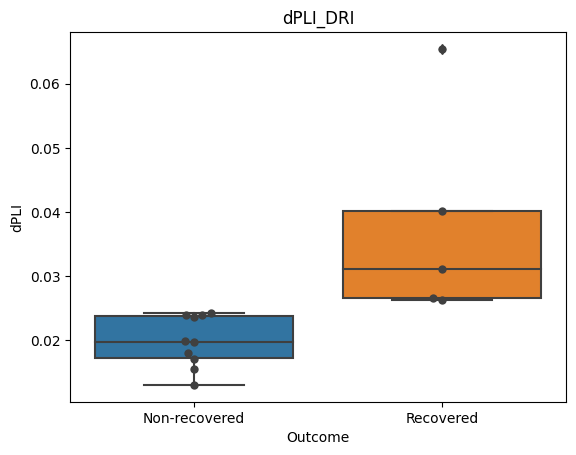

In [61]:

ax = sns.boxplot(x="Outcome", y="dPLI", data=data)
sns.swarmplot(x="Outcome", y="dPLI", data=data, color=".25", size = 6)
ax.set_title('dPLI_DRI')
ax.set_xticklabels(['Non-recovered','Recovered'])

[Text(0, 0, 'Non-recovered'), Text(1, 0, 'Recovered')]

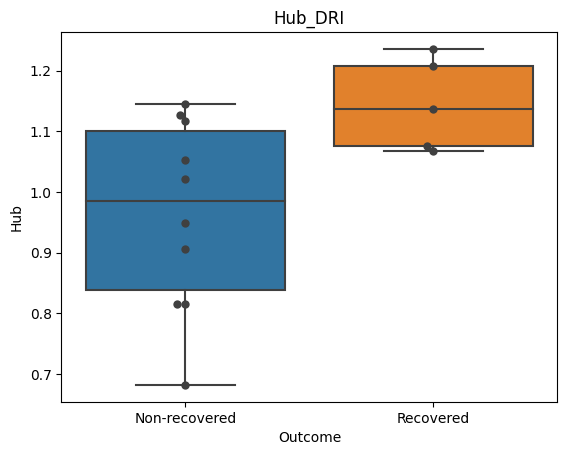

In [62]:

ax = sns.boxplot(x="Outcome", y="Hub", data=data)
sns.swarmplot(x="Outcome", y="Hub", data=data,color=".25",size = 6)
ax.set_title('Hub_DRI')
ax.set_xticklabels(['Non-recovered','Recovered'])

# Standardize the Data, show new data and plot

In [63]:
X = data[['dPLI','Hub']]
scaler = preprocessing.StandardScaler()
X_stand = pd.DataFrame(scaler.fit_transform(X))
X_stand.columns=X.columns


In [64]:
data_stand = data.copy()
data_stand['Hub']= X_stand['Hub'].copy()
data_stand['dPLI']= X_stand['dPLI'].copy()
data_stand['ARI']=data_stand['dPLI']+data_stand['Hub']
data_stand

,ID,dPLI,Hub,Outcome,Diagnose,CRSR,ARI
0,WSAS02,0.033749,1.380145,1,1,4,1.413894
1,WSAS05,-0.487635,0.791457,0,2,10,0.303822
2,WSAS09,3.196005,0.339437,1,1,4,3.535441
3,WSAS10,-0.135333,-0.018602,0,1,5,-0.153935
4,WSAS11,-0.187970,0.604011,0,1,6,0.416041
5,WSAS12,-0.162084,-0.769250,0,2,11,-0.931333
6,WSAS13,-0.155847,-1.354948,0,1,5,-1.510796
7,WSAS17,-0.715672,-1.350942,0,0,0,-2.066614
8,WSAS18,-0.501709,0.675954,0,1,5,0.174244
9,WSAS20,0.054922,0.739697,1,1,3,0.794619


# Perform Logistic Regression

In [65]:
X_stand = data_stand[['dPLI','Hub']]
Y = data_stand['Outcome']

In [98]:
c = 10
clf1 = LogisticRegression(random_state=0,penalty='l2',C = c).fit(X_stand, Y)
preds = clf1.predict(X_stand)
accuracy_score(Y,preds)


1.0

In [99]:
# implement LOSO
loo = LeaveOneOut()
loo.get_n_splits(X_stand)

15

In [100]:
LOSO_scores = []
Preds = []
for train_index, test_index in loo.split(X_stand):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_stand.iloc[train_index], X_stand.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    #print(X_train, X_test, y_train, y_test)
    clf = LogisticRegression(random_state=0,penalty='l2', C = c).fit(X_train, y_train)
    pred = clf.predict(X_test)
    Preds.append(pred[0])
    acc = clf.score(X_test, y_test)
    print('LOSO Accuracy:  ', acc)
    LOSO_scores.append(acc)

TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] TEST: [0]
LOSO Accuracy:   1.0
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14] TEST: [1]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14] TEST: [2]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14] TEST: [3]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14] TEST: [4]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14] TEST: [5]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14] TEST: [6]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14] TEST: [7]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14] TEST: [8]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14] TEST: [9]
LOSO Accuracy:   0.0
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14] TEST: [10]
LOSO Accuracy:   1.0
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14] TEST: [11]
LOSO Accuracy:   1.0
TRAIN: [ 0  1 

In [101]:
#Mean LOSO Score
print('Overall LOSO Accuracy:  ', np.mean(LOSO_scores))

Overall LOSO Accuracy:   0.8666666666666667


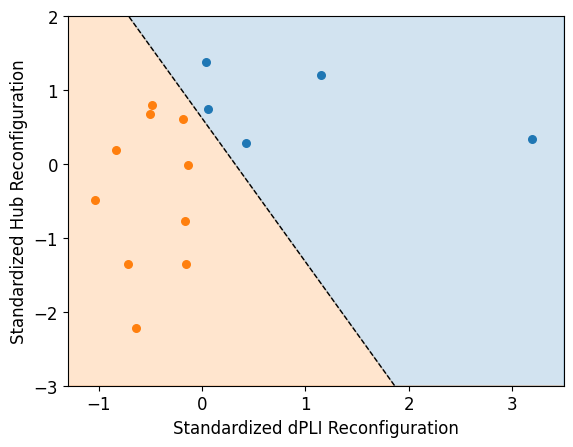

In [102]:
# Plot Model 

# Retrieve the model parameters.
b = clf1.intercept_[0]
w1, w2 = clf1.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1.3,3.5
ymin, ymax = -3, 2
#xmin, xmax = -0.2, 0.2
#ymin, ymax = 0, 2.5

xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:orange', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:blue', alpha=0.2)

plt.scatter(X_stand['dPLI'][Y==1],X_stand['Hub'][Y==1], s = 30)
plt.scatter(X_stand['dPLI'][Y==0],X_stand['Hub'][Y==0], s = 30)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel('Standardized Hub Reconfiguration', fontsize = 12)
plt.xlabel('Standardized dPLI Reconfiguration', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [97]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y,Preds)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[10  0]
 [ 2  3]]
Accuracy :  0.8666666666666667
Sensitivity :  1.0
Specificity :  0.6


/Users/charlotte/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


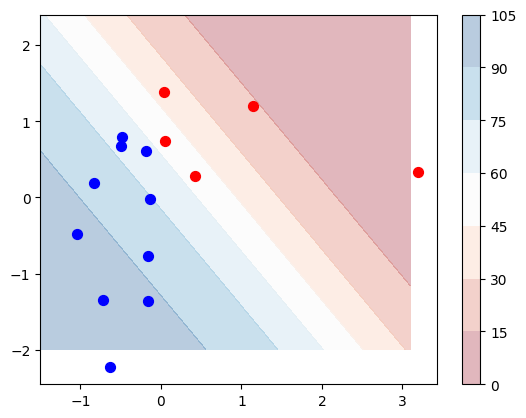

In [72]:
# Plot Model differently 

fig = plt.figure()
# Plot the data and the classification with the decision boundary.
xmin, xmax = -1.5, 3.2
ymin, ymax = -2, 2.5

# define the x and y scale
x1grid = np.arange(xmin, xmax, 0.1)
x2grid = np.arange(ymin, ymax, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_stand, Y)
# make predictions for the grid
yhat = model.predict_proba(grid)
# keep just the probabilities for class 0
yhat = yhat[:, 0]
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)*100
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='RdBu',alpha= 0.3)
# add a legend, called a color bar
plt.colorbar(c)
# create scatter plot for samples from each class

# create scatter of these samples
plt.scatter(X_stand['dPLI'][Y == 0], X_stand['Hub'][Y == 0], color = 'Blue',s = 50)
plt.scatter(X_stand['dPLI'][Y == 1], X_stand['Hub'][Y == 1], color = 'Red',s = 50)

# show the plot
plt.show()

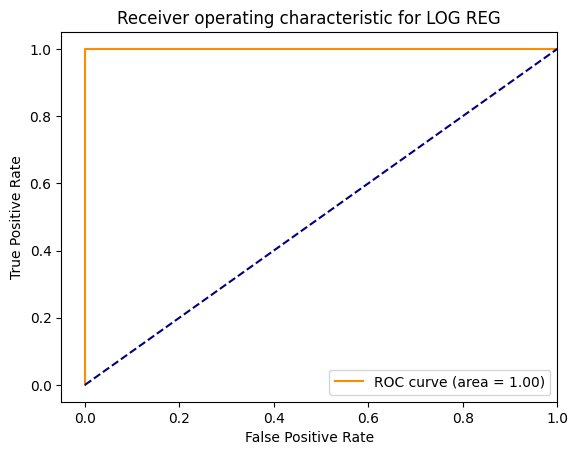

In [73]:
# GET ROC AUC
y_score = clf1.predict_proba(X_stand)[:,1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = metrics.roc_curve(Y, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for LOG REG')
plt.legend(loc="lower right")
